In [92]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Apply with Multiple Arguments

In [93]:
height = Table.read_table('galton.csv').select(1, 2, 7).relabeled(2, 'child')
height

father,mother,child
78.5,67,73.2
78.5,67,69.2
78.5,67,69
78.5,67,69
75.5,66.5,73.5
75.5,66.5,72.5
75.5,66.5,65.5
75.5,66.5,65.5
75,64,71
75,64,68


In [94]:
t = height.with_column(
    'tallest', height.apply(max, 'father', 'mother', 'child')
)
t

father,mother,child,tallest
78.5,67,73.2,78.5
78.5,67,69.2,78.5
78.5,67,69,78.5
78.5,67,69,78.5
75.5,66.5,73.5,75.5
75.5,66.5,72.5,75.5
75.5,66.5,65.5,75.5
75.5,66.5,65.5,75.5
75,64,71,75
75,64,68,75


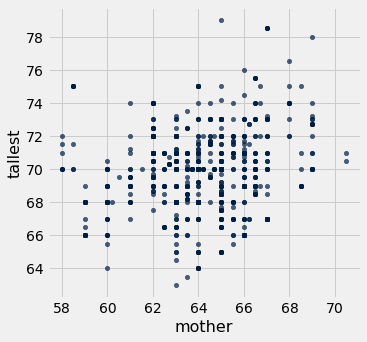

In [97]:
t.scatter('mother', 'tallest')

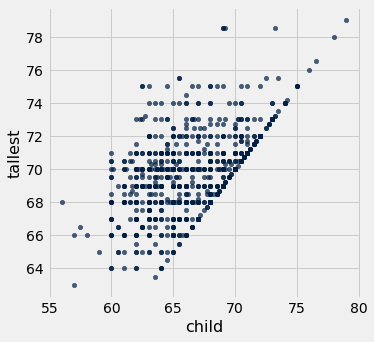

In [21]:
t.scatter('child', 'tallest')

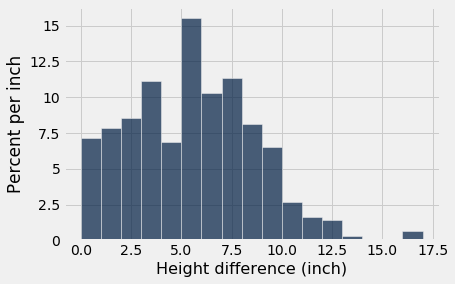

In [98]:
def abs_diff(x, y):
    return abs(x - y)

diffs = height.apply(abs_diff, 'father', 'mother')
Table().with_column('Height difference', diffs).hist(unit='inch', bins=np.arange(0, 18, 1))

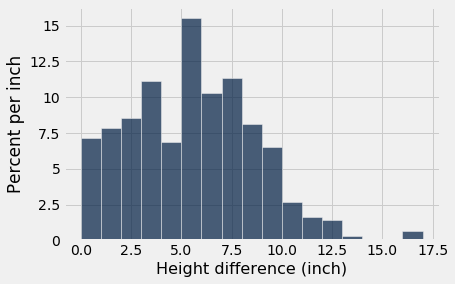

In [23]:
diffs = abs(height.column('father') - height.column('mother'))
Table().with_column('Height difference', diffs).hist(unit='inch', bins=np.arange(0, 18, 1))

## Group

In [101]:
all_cones = Table.read_table('cones.csv')
#all_cones
cones = all_cones.drop('Color').exclude(5)
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25


In [102]:
cones.group('Flavor')

Flavor,count
chocolate,3
strawberry,2


In [107]:
cones.group('Flavor', sum)
#help(cones.group)

Flavor,Price sum
chocolate,15.25
strawberry,8.8


In [108]:
cones.where('Flavor', are.equal_to('chocolate')).column('Price')

array([4.75, 5.25, 5.25])

In [109]:
sum(cones.where('Flavor', are.equal_to('chocolate')).column('Price'))

15.25

In [110]:
sum(cones.where('Flavor', are.equal_to('strawberry')).column('Price'))

8.8

In [52]:
cones.group('Flavor', max)

Flavor,Price max
chocolate,5.25
strawberry,5.25


In [111]:
cones.group('Flavor', list)

Flavor,Price list
chocolate,"[4.75, 5.25, 5.25]"
strawberry,"[3.55, 5.25]"


Which NBA team payed their players the most?

In [112]:
nba = Table.read_table('nba_salaries.csv').relabeled(3, 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


Keep only team and salary columns for analysis

In [113]:
teams_and_money = nba.select('TEAM', 'SALARY')
teams_and_money

TEAM,SALARY
Atlanta Hawks,18.6717
Atlanta Hawks,12
Atlanta Hawks,9.75625
Atlanta Hawks,8
Atlanta Hawks,5.74648
Atlanta Hawks,4
Atlanta Hawks,3.33333
Atlanta Hawks,2
Atlanta Hawks,1.7634
Atlanta Hawks,1.30452


In [114]:
teams_and_money.group('TEAM', sum)

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


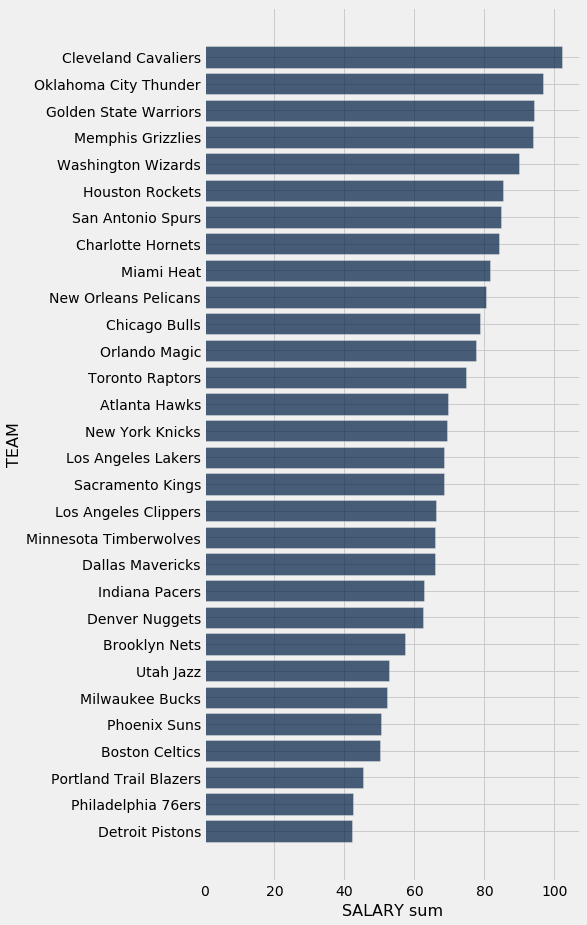

In [60]:
teams_and_money.group('TEAM', sum).sort(1, descending=True).barh('TEAM')

In [115]:
nba.group('POSITION')

POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


In [116]:
positions_and_money = nba.select('POSITION', 'SALARY')
positions_and_money.group('POSITION', np.mean)

POSITION,SALARY mean
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


In [117]:
nba.group('POSITION', np.mean)

POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
PF,,,4.95134
PG,,,5.16549
SF,,,5.53267
SG,,,3.9882


## Group by multiple columns

In [118]:
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [65]:
all_cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [66]:
all_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [67]:
all_cones.group(['Flavor', 'Color'], min)

Flavor,Color,Price min
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,3.55


## Challenge question

Which NBA teams spent the most on their starters in 2016?
* Each team has one starter per position
* Assume the starter for a team & position is the player with the highest salary on that team in that position

In [119]:
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [120]:
starters = nba.drop('PLAYER').group(['TEAM', 'POSITION'], max)
starters

TEAM,POSITION,SALARY max
Atlanta Hawks,C,12
Atlanta Hawks,PF,18.6717
Atlanta Hawks,PG,8
Atlanta Hawks,SF,4
Atlanta Hawks,SG,5.74648
Boston Celtics,C,2.61698
Boston Celtics,PF,5
Boston Celtics,PG,7.73034
Boston Celtics,SF,6.79612
Boston Celtics,SG,3.42551


In [121]:
starters.drop('POSITION').group('TEAM', sum).sort(1, descending=True)

TEAM,SALARY max sum
Cleveland Cavaliers,82.3166
Oklahoma City Thunder,70.6988
Miami Heat,67.1273
San Antonio Spurs,67.034
Golden State Warriors,66.6431
Houston Rockets,61.2029
Chicago Bulls,57.8247
Los Angeles Lakers,55.8276
New York Knicks,55.0595
Memphis Grizzlies,53.5235


## Pivot tables

In [91]:
all_cones.pivot('Flavor', 'Color')

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [125]:
all_cones.pivot('Flavor', 'Color', values='Price', collect=list)

Color,bubblegum,chocolate,strawberry
dark brown,None,"[5.25, 5.25]",None
light brown,None,[4.75],None
pink,[4.75],None,"[3.55, 5.25]"


In [122]:
all_cones.group(['Flavor', 'Color'], min)

Flavor,Color,Price min
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,3.55


In [75]:
nba.pivot('POSITION', 'TEAM')

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,3,2,2,2,5
Boston Celtics,3,2,4,2,4
Brooklyn Nets,1,3,2,2,5
Charlotte Hornets,3,3,4,2,6
Chicago Bulls,2,2,2,2,4
Cleveland Cavaliers,4,1,3,1,1
Dallas Mavericks,2,2,4,1,2
Denver Nuggets,4,2,2,4,2
Detroit Pistons,3,0,1,4,2
Golden State Warriors,3,3,2,4,2


In [76]:
nba.pivot('POSITION', 'TEAM', 'SALARY', max)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,12,18.6717,8,4,5.74648
Boston Celtics,2.61698,5,7.73034,6.79612,3.42551
Brooklyn Nets,1.3629,11.236,6.3,24.8949,3.42551
Charlotte Hornets,13.5,7,12,6.3314,13.1253
Chicago Bulls,13.4,5.54373,20.0931,2.38044,16.4075
Cleveland Cavaliers,14.2609,19.689,16.4075,22.9705,8.98876
Dallas Mavericks,5.2,15.4937,5.37897,15.3615,1.449
Denver Nuggets,5.6135,11.236,4.345,14,1.58448
Detroit Pistons,6.5,0,13.913,2.84196,6.27
Golden State Warriors,13.8,14.2609,11.3708,11.7105,15.501
